<a href="https://colab.research.google.com/github/shri-durga28/Prodigy-Infotech-Internship/blob/main/PRODIGY_INFOTECH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

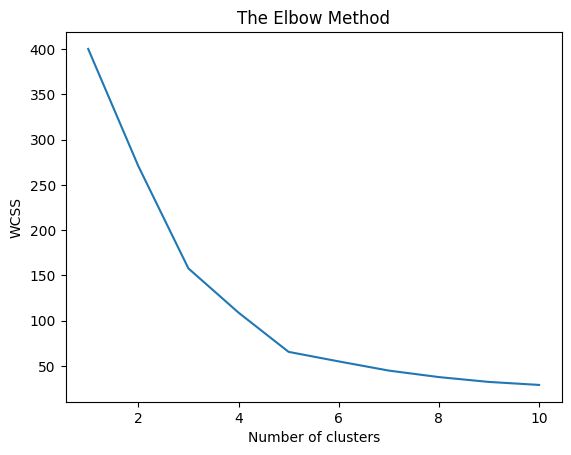

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


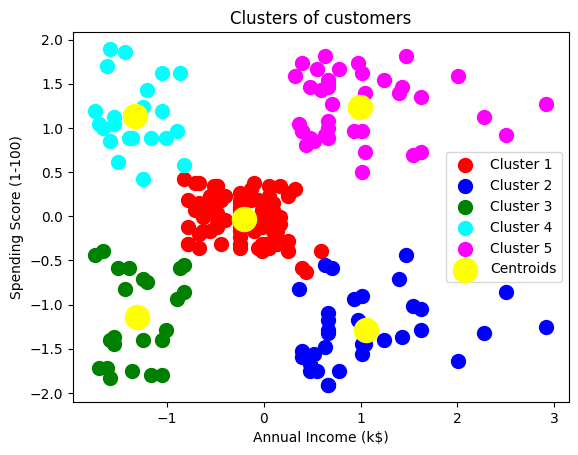

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
s = pd.read_csv("/content/Mall_Customers.csv")
X = s.iloc[:,[3,4]].values
s['Genre'] = s['Genre'].apply(lambda x: 1 if x == 'Male' else (0 if x == 'Female' else None))
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i,init = 'k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()
kmeans = KMeans(n_clusters = 5,init = 'k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s=100, c = 'red',label='Cluster 1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s=100, c = 'blue',label='Cluster 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s=100, c = 'green',label='Cluster 3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],s=100, c = 'cyan',label='Cluster 4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],s=100, c = 'magenta',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="yellow",label="Centroids")
plt.title("Clusters of customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

TASK 2

     Car_Name  Year  Selling_Price  Kms_Driven  Fuel_Type  Seller_Type  \
0          90  2014           3.35       27000          2            0   
1          93  2013           4.75       43000          1            0   
2          68  2017           7.25        6900          2            0   
3          96  2011           2.85        5200          2            0   
4          92  2014           4.60       42450          1            0   
..        ...   ...            ...         ...        ...          ...   
296        69  2016           9.50       33988          1            0   
297        66  2015           4.00       60000          2            0   
298        69  2009           3.35       87934          2            0   
299        69  2017          11.50        9000          1            0   
300        66  2016           5.30        5464          2            0   

     Transmission  Owner  
0               1      0  
1               1      0  
2               1      0  
3  

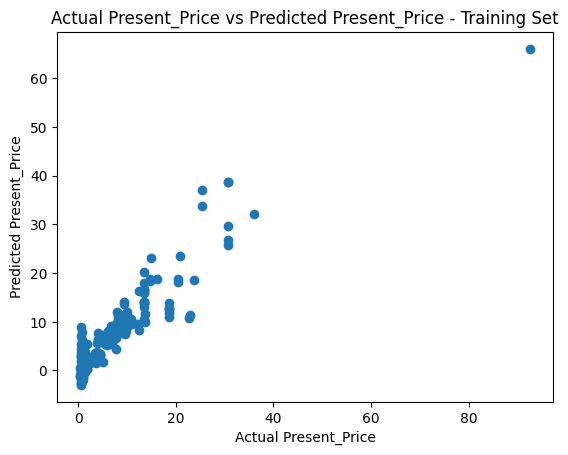

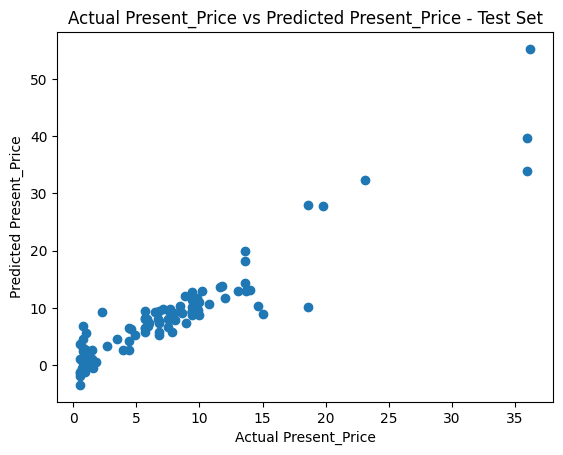

0.7704557404226521

In [4]:
#IMPORTING LIBRARY FILES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#READING THE DATASET
s=pd.read_csv("/content/car data.csv")
s.head()
#CONVERSION OF CATEGORICAL VALUES INTO NUMERIC DATAS
s['Car_Name'] = s['Car_Name'].astype('category')
s['Car_Name'] = s['Car_Name'].cat.codes
s['Fuel_Type'] = s['Fuel_Type'].astype('category')
s['Fuel_Type'] = s['Fuel_Type'].cat.codes
s['Seller_Type'] = s['Seller_Type'].astype('category')
s['Seller_Type'] = s['Seller_Type'].cat.codes
s['Transmission'] = s['Transmission'].astype('category')
s['Transmission'] = s['Transmission'].cat.codes
s.head()
#CHECKING FOR NULL VALUES
s.isnull().sum()
#CATEGORIZATION OF DATASETS
X = s.drop(columns='Present_Price')
print(X)
y = s['Present_Price']
#SPLITTING OF TRAINING AND TEST DATA
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)
#CREATING LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
#CALCULATING COEFFICENTS
c = reg.intercept_
c
m = reg.coef_
m
#PREDICTIONS FOR TRAINING DATA
y_pred_train = reg.predict(X_train)
y_pred_train
plt.scatter(y_train,y_pred_train)
plt.title("Actual Present_Price vs Predicted Present_Price - Training Set")
plt.xlabel("Actual Present_Price")
plt.ylabel("Predicted Present_Price")
plt.show()
from sklearn.metrics import r2_score
r2_score(y_train,y_pred_train)
#PREDICTIONS FOR TEST DATA
y_pred_test = reg.predict(X_test)
y_pred_test
plt.scatter(y_test,y_pred_test)
plt.title("Actual Present_Price vs Predicted Present_Price - Test Set")
plt.xlabel("Actual Present_Price")
plt.ylabel("Predicted Present_Price")
plt.show()
r2_score(y_test,y_pred_test)
